In [9]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from catboost import CatBoostClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import time
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Same features

We will train a CatBoost model on the Titanic dataset.

In [68]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [49]:
titanic = sns.load_dataset('titanic')
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic.drop(columns=['who', 'embarked', 'parch', 'fare', 'deck', 'embark_town', 'alive',"alone"], inplace=True)

In [50]:
titanic

,survived,pclass,sex,age,sibsp,class,adult_male,deck
0,0,3,male,22.0,1,Third,True,NaN
1,1,1,female,38.0,1,First,False,C
2,1,3,female,26.0,0,Third,False,NaN
3,1,1,female,35.0,1,First,False,C
4,0,3,male,35.0,0,Third,True,NaN
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,Second,True,NaN
887,1,1,female,19.0,0,First,False,B
888,0,3,female,28.0,1,Third,False,NaN
889,1,1,male,26.0,0,First,True,C


In [23]:
titanic.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
class         category
adult_male        bool
dtype: object

In [11]:
X = titanic.drop(columns=['survived'])
y = titanic['survived']

cat_features = ["sex", "class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Initialize CatBoost Classifier
catboost_model = CatBoostClassifier(iterations=1000, 
                                    learning_rate=0.05, 
                                    depth=6, 
                                    verbose=100)

# Train the model
catboost_model.fit(X_train, y_train, 
                   eval_set = (X_test, y_test),
                   cat_features=cat_features,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6580557	test: 0.6605953	best: 0.6605953 (0)	total: 4.53ms	remaining: 4.52s
100:	learn: 0.3623712	test: 0.4389407	best: 0.4342884 (54)	total: 132ms	remaining: 1.17s
200:	learn: 0.3290721	test: 0.4464352	best: 0.4342884 (54)	total: 259ms	remaining: 1.03s
300:	learn: 0.2948500	test: 0.4622076	best: 0.4342884 (54)	total: 381ms	remaining: 885ms
400:	learn: 0.2705013	test: 0.4815633	best: 0.4342884 (54)	total: 504ms	remaining: 752ms
500:	learn: 0.2543093	test: 0.4819774	best: 0.4342884 (54)	total: 620ms	remaining: 617ms
600:	learn: 0.2365757	test: 0.5020818	best: 0.4342884 (54)	total: 746ms	remaining: 495ms
700:	learn: 0.2223124	test: 0.5150025	best: 0.4342884 (54)	total: 877ms	remaining: 374ms
800:	learn: 0.2103955	test: 0.5245270	best: 0.4342884 (54)	total: 1.01s	remaining: 251ms
900:	learn: 0.2017951	test: 0.5409616	best: 0.4342884 (54)	total: 1.14s	remaining: 125ms
999:	learn: 0.1923563	test: 0.5446243	best: 0.4342884 (54)	total: 1.31s	remaining: 0us

bestTest = 0.4342883903


In [16]:
# Make predictions
y_pred_cb = catboost_model.predict(X_test)

# Evaluate the Cat_boost
cb_accuracy = accuracy_score(y_test, y_pred_cb)
print(f"CatBoost Accuracy: {cb_accuracy:.4f}")
print(classification_report(y_test, y_pred_cb))

CatBoost Accuracy: 0.8212
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       105
           1       0.86      0.68      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.82      0.82       179



# Other features

Try adding other categorical features. Does your accuracy improve?

In [69]:
titanic = sns.load_dataset('titanic')
titanic['age'].fillna(titanic['age'].median(), inplace=True)
# Manipulate the columns that you add
titanic.drop(columns=['who', 'parch', 'deck', 'alive',"alone"], inplace=True)

In [56]:
titanic

,survived,pclass,sex,age,sibsp,fare,class,adult_male,embark_town,alive
0,0,3,male,22.0,1,7.2500,Third,True,Southampton,no
1,1,1,female,38.0,1,71.2833,First,False,Cherbourg,yes
2,1,3,female,26.0,0,7.9250,Third,False,Southampton,yes
3,1,1,female,35.0,1,53.1000,First,False,Southampton,yes
4,0,3,male,35.0,0,8.0500,Third,True,Southampton,no
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,Second,True,Southampton,no
887,1,1,female,19.0,0,30.0000,First,False,Southampton,yes
888,0,3,female,28.0,1,23.4500,Third,False,Southampton,no
889,1,1,male,26.0,0,30.0000,First,True,Cherbourg,yes


In [70]:
titanic.isna().sum()


survived       0
pclass         0
sex            0
age            0
sibsp          0
fare           0
embarked       2
class          0
adult_male     0
embark_town    2
dtype: int64

In [71]:
titanic.dropna(inplace = True)

In [72]:
titanic.isna().sum()


survived       0
pclass         0
sex            0
age            0
sibsp          0
fare           0
embarked       0
class          0
adult_male     0
embark_town    0
dtype: int64

In [73]:
X = titanic.drop(columns=['survived'])
y = titanic['survived']

cat_features = ["sex", "class", 'embark_town', 'embarked']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Initialize CatBoost Classifier
catboost_model = CatBoostClassifier(iterations=1000, 
                                    learning_rate=0.05, 
                                    depth=6, 
                                    verbose=100)

# Train the model
catboost_model.fit(X_train, y_train, 
                   eval_set = (X_test, y_test),
                   cat_features=cat_features,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6628153	test: 0.6607763	best: 0.6607763 (0)	total: 10.6ms	remaining: 10.5s
100:	learn: 0.3421664	test: 0.4302964	best: 0.4226777 (60)	total: 183ms	remaining: 1.63s
200:	learn: 0.2948588	test: 0.4455716	best: 0.4226777 (60)	total: 332ms	remaining: 1.32s
300:	learn: 0.2495489	test: 0.4583641	best: 0.4226777 (60)	total: 667ms	remaining: 1.55s
400:	learn: 0.2137242	test: 0.4626615	best: 0.4226777 (60)	total: 825ms	remaining: 1.23s
500:	learn: 0.1835696	test: 0.4652232	best: 0.4226777 (60)	total: 997ms	remaining: 993ms
600:	learn: 0.1641313	test: 0.4776361	best: 0.4226777 (60)	total: 1.16s	remaining: 769ms
700:	learn: 0.1454106	test: 0.4847404	best: 0.4226777 (60)	total: 1.33s	remaining: 566ms
800:	learn: 0.1307983	test: 0.4887427	best: 0.4226777 (60)	total: 1.54s	remaining: 382ms
900:	learn: 0.1188968	test: 0.4954637	best: 0.4226777 (60)	total: 1.7s	remaining: 187ms
999:	learn: 0.1080458	test: 0.5045829	best: 0.4226777 (60)	total: 1.87s	remaining: 0us

bestTest = 0.4226777278
b

In [75]:
# Make predictions
y_pred_cb = catboost_model.predict(X_test)

# Evaluate the Cat_boost
cb_accuracy = accuracy_score(y_test, y_pred_cb)
print(f"CatBoost Accuracy: {cb_accuracy:.4f}")
print(classification_report(y_test, y_pred_cb))

CatBoost Accuracy: 0.8202
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       109
           1       0.81      0.70      0.75        69

    accuracy                           0.82       178
   macro avg       0.82      0.80      0.80       178
weighted avg       0.82      0.82      0.82       178



# Regression

### Now, try doing regression instead of classification. 
Using the California housing dataset, train regression models using Decision Trees, Random Forest, and CatBoost. Then, plot them using sns.regplot. If the points are annoying, set scatter = False. What are their R2?

In [97]:
# Import necessary libraries
from catboost import CatBoostRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

import statsmodels.api as sm

# Load the California housing dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target



In [101]:
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()
print(ols_results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                          2.137e+04
Date:                Thu, 03 Oct 2024   Prob (F-statistic):                        0.00
Time:                        17:30:16   Log-Likelihood:                         -24087.
No. Observations:               20640   AIC:                                  4.819e+04
Df Residuals:                   20632   BIC:                                  4.825e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

([<matplotlib.axis.YTick at 0x1556b4890>,
 [Text(0, 0, 'AveRooms'),
  Text(0, 1, 'Latitude'),
  Text(0, 2, 'Longitude'),
  Text(0, 3, 'AveOccup'),
  Text(0, 4, 'Population'),
  Text(0, 5, 'HouseAge'),
  Text(0, 6, 'MedInc'),
  Text(0, 7, 'AveBedrms')])

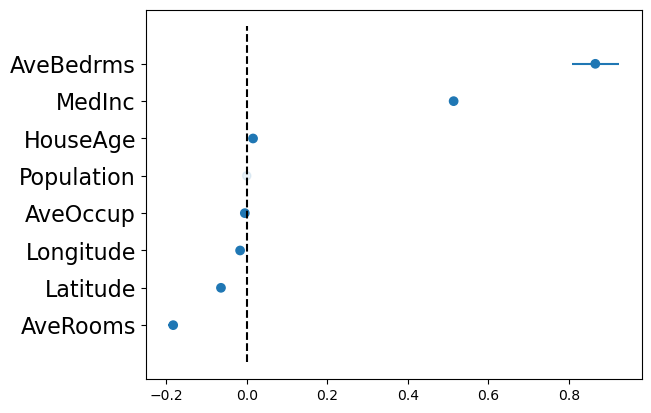

In [100]:
R = ols_results.summary().tables[1].data
R = pd.DataFrame(R)
R.columns = R.iloc[0]
R = R.iloc[1:]
R[R.columns[1:]] = R[R.columns[1:]].astype(float)
R.columns = ["vari", "coef", "std_err", "t", "p_val", "low_b", "up_b" ]

R = R.sort_values("coef", ascending = True)
R = R.reset_index(drop=True)

p = 0.1
R["alpha"] = (R.p_val < 0.05 ) * (1-p) + p

plt.hlines(R.index, R.low_b, R.up_b, alpha = R.alpha)
plt.scatter(R.coef, R.index, alpha = R.alpha)

plt.vlines(0,0-1,len(R), linestyle="--", color = "black")

plt.yticks(R.index,R.vari, fontsize=16)

In [208]:
# Load the California housing dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target


In [210]:
y = pd.DataFrame(data.target, columns=data.target_names)
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [201]:
y['MedHouseVal'] = pd.qcut(y['MedHouseVal'], 3, labels=["low", "medium", "high"])
y

,MedHouseVal
0,high
1,high
2,high
3,high
4,high
...,...
20635,low
20636,low
20637,low
20638,low


In [202]:
X.drop(columns  = ["Latitude"], inplace= True)

In [204]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()

# y = label_encoder.fit_transform(pd.cut(y['MedHouseVal'], 5, retbins=True)[0])



In [205]:

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train.shape}, Test set shape: {X_test.shape}')

Training set shape: (16512, 7), Test set shape: (4128, 7)


In [206]:
# Create and train the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42, criterion='gini',max_depth=4)
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree.predict(X_test)

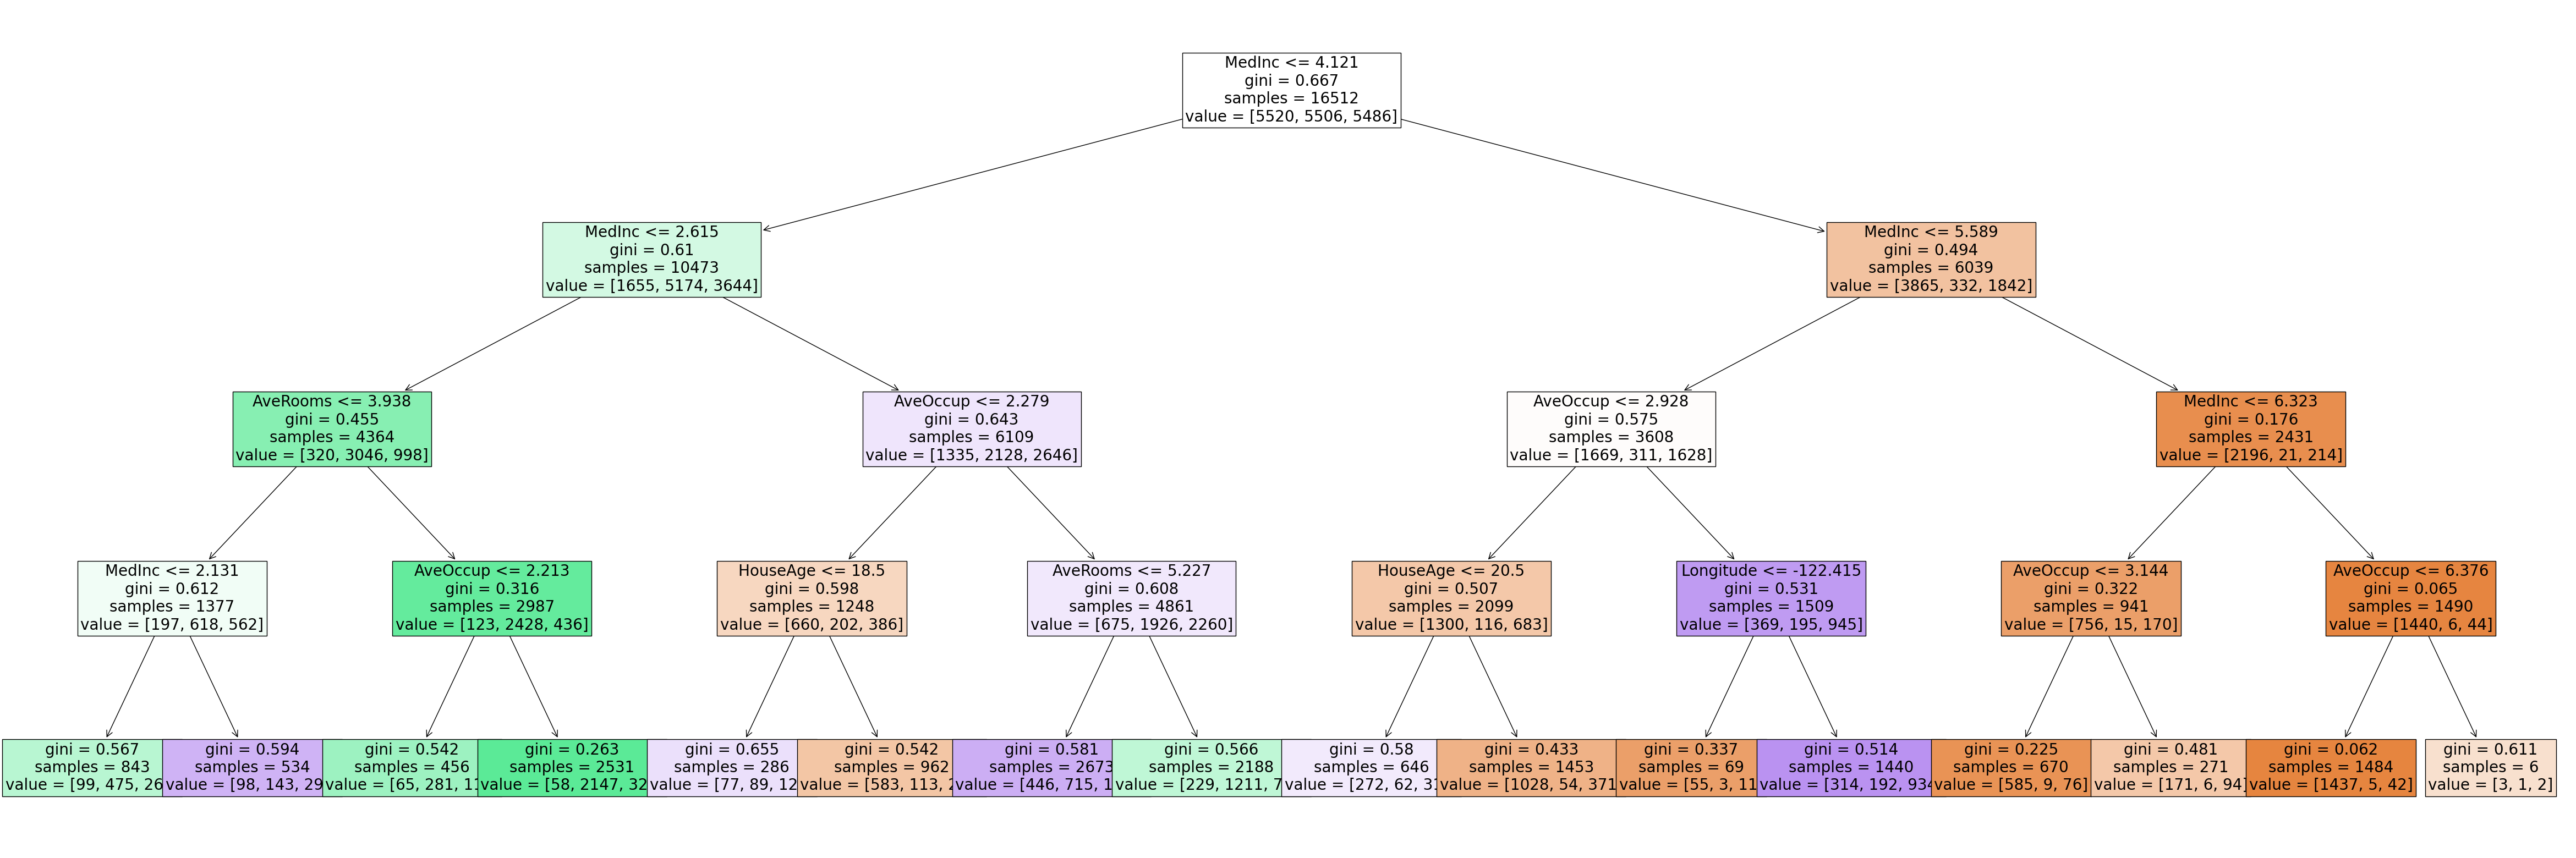

In [207]:
plt.figure(figsize=(60,20))
from sklearn import tree

tree.plot_tree(decision_tree, 
                   feature_names=X.columns,  
                   filled=True, max_depth=4,fontsize=20,
      )
print("")

In [211]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [238]:
# Load the California housing dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [248]:
# Initialize the DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42, max_depth =6)

# Fit the model to the training data
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.6205125146233951

In [249]:
y_pred = regressor.predict(X_test)


<Axes: >

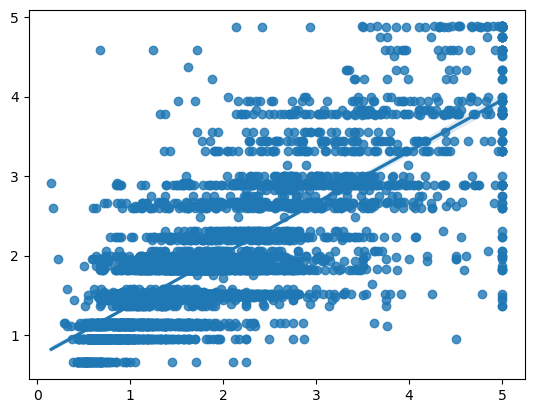

In [250]:
sns.regplot(x = y_test, y= y_pred)

In [251]:
from catboost import CatBoostRegressor
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostRegressor(iterations=500, depth=6, learning_rate=0.1, loss_function='RMSE', random_seed=42)

# Train the model with categorical features specified
model.fit(X_train, y_train, verbose=100)

y_pred = model.predict(X_test)


0:	learn: 1.0934740	total: 3.52ms	remaining: 1.75s
100:	learn: 0.4867395	total: 214ms	remaining: 844ms
200:	learn: 0.4320149	total: 421ms	remaining: 626ms
300:	learn: 0.4020581	total: 631ms	remaining: 417ms
400:	learn: 0.3803801	total: 866ms	remaining: 214ms
499:	learn: 0.3634860	total: 1.07s	remaining: 0us


In [234]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2

0.8430669062571834

<Axes: >

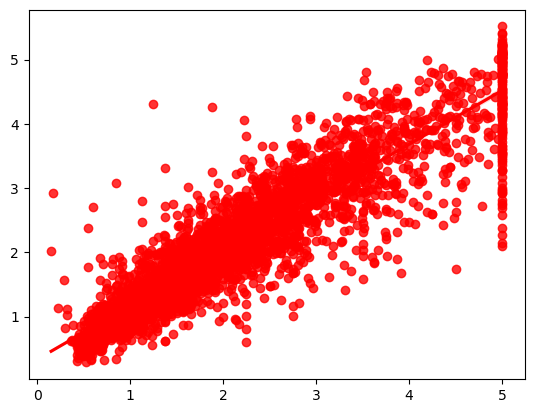

In [254]:
sns.regplot(x =y_test, y = y_pred, color ='r')